## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# Task: 1 Logistic Regression¶

In [4]:
data_copy = data.drop(['target'],axis=1)

In [5]:
correlation = data_copy.corr()
correlation

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


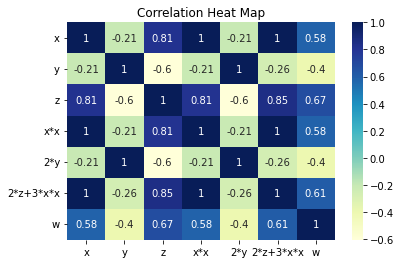

In [6]:
# https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
plt.title("Correlation Heat Map")
corr_heatmap = sns.heatmap(correlation, cmap='YlGnBu',annot=True)

In [7]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

# 2. Finding the best model for the given data

In [8]:
# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html?highlight=log%20space#numpy.logspace
alpha = np.logspace(-9,9,num=12)
sg_c_value = {'C':alpha}

In [9]:
LR = LogisticRegression()
best_C = GridSearchCV(LR,sg_c_value,cv=15)

In [10]:
best_C.fit(X,Y)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-09, 4.32876128e-08, 1.87381742e-06, 8.11130831e-05,
       3.51119173e-03, 1.51991108e-01, 6.57933225e+00, 2.84803587e+02,
       1.23284674e+04, 5.33669923e+05, 2.31012970e+07, 1.00000000e+09])})

In [11]:
best_C.best_params_

{'C': 0.0035111917342151347}

In [12]:
LR = LogisticRegression(C=0.0001)

In [13]:
best_model = LR.fit(X,Y)

In [14]:
print(best_model)

LogisticRegression(C=0.0001)


# 3. Getting the weights with the original data

In [15]:
predictions = LR.predict(X)
best_model_accuracy = accuracy_score(Y,predictions)
print(best_model_accuracy)

1.0


In [16]:
best_model_weight  = best_model.coef_[0]
print(best_model_weight)

[ 0.0035963  -0.00341973  0.00479983  0.00355269 -0.00341973  0.00377695
  0.00316971]


# 4. Modifying original data   

In [17]:
updated_X = X+.1

In [18]:
updated_best_model = LR.fit(updated_X,Y)

In [19]:
print(updated_best_model)

LogisticRegression(C=0.0001)


In [20]:
predictions = LR.predict(updated_X)
best_model_accuracy_edited = accuracy_score(Y,predictions)
print(best_model_accuracy_edited)

1.0


In [21]:
best_model_weight_edited  = updated_best_model.coef_[0]
print(best_model_weight_edited)

[ 0.00359629 -0.00341975  0.0047999   0.00355268 -0.00341975  0.00377694
  0.00316968]


# 5.  Checking deviations in metric and weights 

In [22]:
Difference = (best_model_accuracy_edited-best_model_accuracy)
print(Difference)

0.0


In [23]:
absolute_change_weight = (best_model_weight-best_model_weight_edited)
print(absolute_change_weight)

[ 6.70259303e-09  1.55023327e-08 -6.79469616e-08  1.35483391e-08
  1.55023326e-08  3.94547758e-09  2.25506031e-08]


In [24]:
absolute_change_weight_per=[]
for x in range(len(data_copy.columns)):
    per_change = (absolute_change_weight[x]/best_model_weight[x])
    absolute_change_weight_per.append(per_change)

In [25]:
feature = data_copy.columns.values
feature = feature.tolist()
dict_value = dict(zip(feature,absolute_change_weight_per))

In [26]:
value_sort = sorted(dict_value.items(), key = lambda k:k[1])
value = []
for x in range (len(value_sort)):
    value.append(value_sort[x][0])
print(value[-4:])

['2*z+3*x*x', 'x', 'x*x', 'w']
